In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_json('../data/processed/hw-study/aggregate_hw_metrics.json')
colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']

In [237]:
times = df.groupby(['GPU', 'CPU', 'storage', 'game_name'])[['level', 'load']].mean()

In [238]:
print(times)

                                                          level       load
GPU            CPU               storage game_name                        
GTX 960        i5-6500 @ 3.20GHz SSD     Apex          5.938895  36.894357
                                         CSGO         23.313787   2.128155
                                         Hearthstone   9.098126  17.235178
                                         Minecraft    24.602009  21.260325
               i5-7600 @ 3.5GHz  SSD     Apex          5.700693  34.930745
                                         CSGO         27.622268   2.025365
                                         Hearthstone   9.030372  16.985565
                                         Minecraft    34.480647  21.935052
Radeon HD 6800 i5-7600 @ 3.5GHz  HDD     Apex          7.906578  39.493397
                                         CSGO         23.938796   2.015211
                                         Hearthstone   8.641719  16.853833
                         

In [245]:
def plotHWBarChart(A, B, label_A, label_B, labels, title, ci_A, ci_B):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.bar(x - width/2, A, width, label=label_A, yerr=ci_A, capsize=7, color=colors[0])
    ax.bar(x + width/2, B, width, label=label_B, yerr=ci_B, capsize=7, color=colors[4])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time (seconds)')
    ax.set_title(title)
    ax.set_xticks(x, labels, rotation=40, ha="right")
    ax.legend()

    fig.tight_layout()
    plt.savefig(title + '.png')
    plt.show()

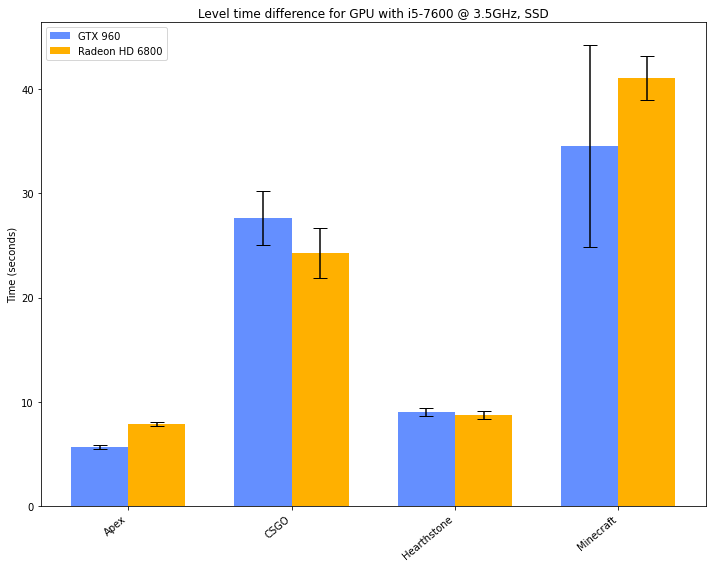

In [246]:
trial_type = 'level'
times = df.query( 'CPU == ["i5-7600 @ 3.5GHz"]' )
times = times.query( 'storage == ["SSD"]' )

times_nvidia = times.query( 'GPU == ["GTX 960"]' )
times_nvidia = times_nvidia.groupby(['game_name'])[[trial_type]]
ci_nvidia = 1.960 * times_nvidia.std().squeeze() / np.sqrt(times_nvidia.size())

times_amd = times.query( 'GPU == ["Radeon HD 6800"]' )
times_amd = times_amd.groupby(['game_name'])[[trial_type]]
ci_amd = 1.960 * times_amd.std().squeeze() / np.sqrt(times_amd.size())

title = 'Level time difference for GPU with i5-7600 @ 3.5GHz, SSD'
plotHWBarChart(times_nvidia.mean()[trial_type], times_amd.mean()[trial_type], 'GTX 960', 'Radeon HD 6800', times_nvidia.mean().index, title, ci_nvidia, ci_amd)

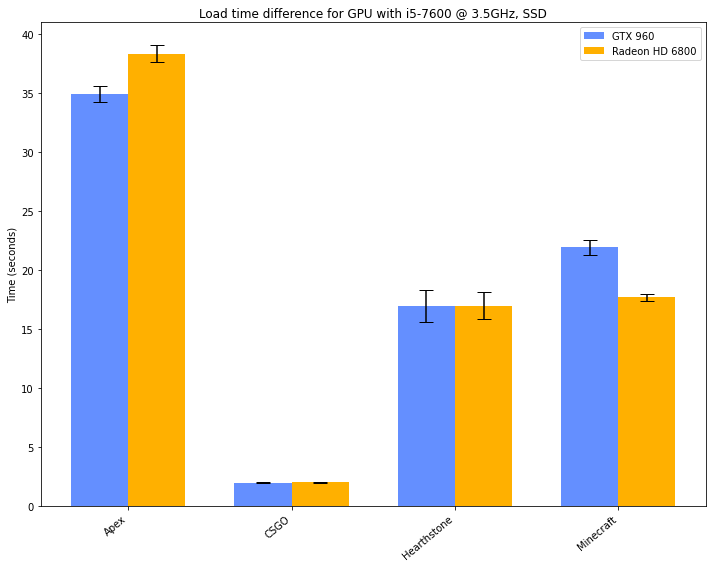

In [247]:
trial_type = 'load'
times = df.query( 'CPU == ["i5-7600 @ 3.5GHz"]' )
times = times.query( 'storage == ["SSD"]' )

times_nvidia = times.query( 'GPU == ["GTX 960"]' )
times_nvidia = times_nvidia.groupby(['game_name'])[[trial_type]]
ci_nvidia = 1.960 * times_nvidia.std().squeeze() / np.sqrt(times_nvidia.size())

times_amd = times.query( 'GPU == ["Radeon HD 6800"]' )
times_amd = times_amd.groupby(['game_name'])[[trial_type]]
ci_amd = 1.960 * times_amd.std().squeeze() / np.sqrt(times_amd.size())

title = 'Load time difference for GPU with i5-7600 @ 3.5GHz, SSD'
plotHWBarChart(times_nvidia.mean()[trial_type], times_amd.mean()[trial_type], 'GTX 960', 'Radeon HD 6800', times_nvidia.mean().index, title, ci_nvidia, ci_amd)

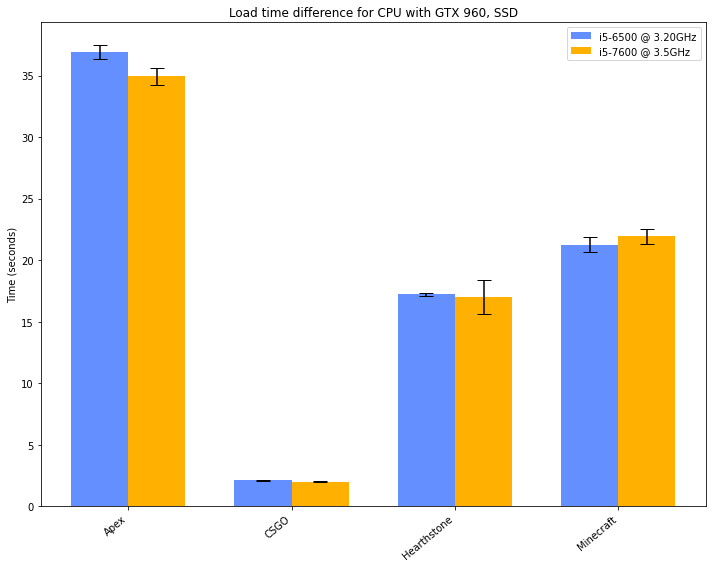

In [248]:
title = 'Load time difference for CPU with GTX 960, SSD'
trial_type = 'load'

times = df.query( 'GPU == ["GTX 960"]' )
times = times.query( 'storage == ["SSD"]' )

times_6gen = times.query( 'CPU == ["i5-6500 @ 3.20GHz"]' )
times_6gen = times_6gen.groupby(['game_name'])[[trial_type]]
ci_6gen = 1.960 * times_6gen.std().squeeze() / np.sqrt(times_6gen.size())

times_7gen = times.query( 'CPU == ["i5-7600 @ 3.5GHz"]' )
times_7gen = times_7gen.groupby(['game_name'])[[trial_type]]
ci_7gen = 1.960 * times_7gen.std().squeeze() / np.sqrt(times_7gen.size())


plotHWBarChart(times_6gen.mean()[trial_type], times_7gen.mean()[trial_type], 'i5-6500 @ 3.20GHz', 'i5-7600 @ 3.5GHz', times_6gen.mean().index, title, ci_6gen, ci_7gen)

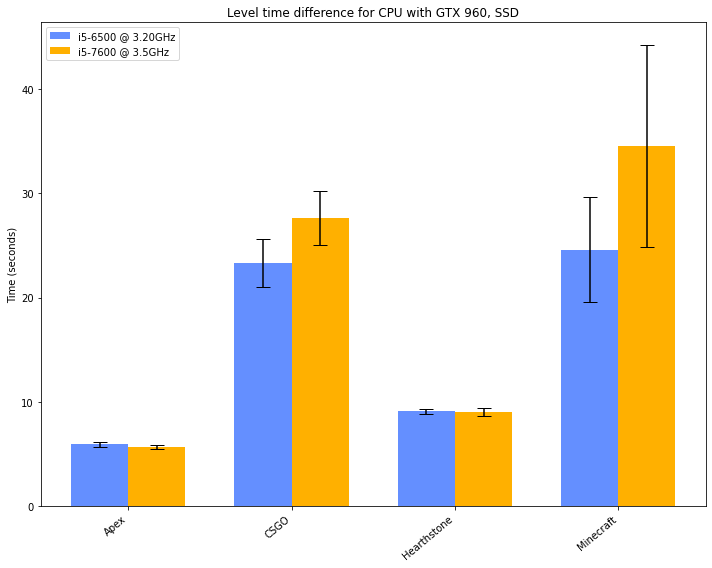

In [249]:
title = 'Level time difference for CPU with GTX 960, SSD'
trial_type = 'level'

times = df.query( 'GPU == ["GTX 960"]' )
times = times.query( 'storage == ["SSD"]' )

times_6gen = times.query( 'CPU == ["i5-6500 @ 3.20GHz"]' )
times_6gen = times_6gen.groupby(['game_name'])[[trial_type]]
ci_6gen = 1.960 * times_6gen.std().squeeze() / np.sqrt(times_6gen.size())

times_7gen = times.query( 'CPU == ["i5-7600 @ 3.5GHz"]' )
times_7gen = times_7gen.groupby(['game_name'])[[trial_type]]
ci_7gen = 1.960 * times_7gen.std().squeeze() / np.sqrt(times_7gen.size())


plotHWBarChart(times_6gen.mean()[trial_type], times_7gen.mean()[trial_type], 'i5-6500 @ 3.20GHz', 'i5-7600 @ 3.5GHz', times_6gen.mean().index, title, ci_6gen, ci_7gen)

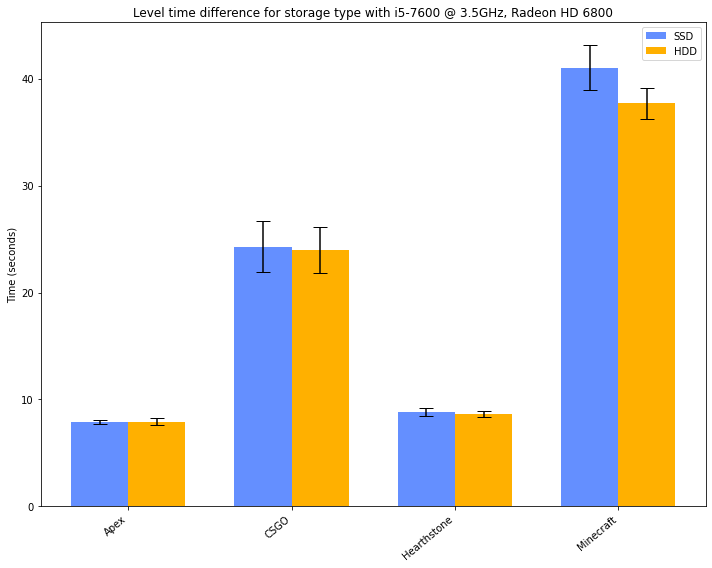

In [250]:
title = 'Level time difference for storage type with i5-7600 @ 3.5GHz, Radeon HD 6800'
trial_type = 'level'

times = df.query( 'GPU == ["Radeon HD 6800"]' )
times = times.query( 'CPU == ["i5-7600 @ 3.5GHz"]' )

times_ssd = times.query( 'storage == ["SSD"]' )
times_ssd = times_ssd.groupby(['game_name'])[[trial_type]]
ci_ssd = 1.960 * times_ssd.std().squeeze() / np.sqrt(times_ssd.size())

times_hdd = times.query( 'storage == ["HDD"]' )
times_hdd = times_hdd.groupby(['game_name'])[[trial_type]]
ci_hdd = 1.960 * times_hdd.std().squeeze() / np.sqrt(times_hdd.size())

plotHWBarChart(times_ssd.mean()[trial_type], times_hdd.mean()[trial_type], 'SSD', 'HDD', times_ssd.mean().index, title, ci_ssd, ci_hdd)

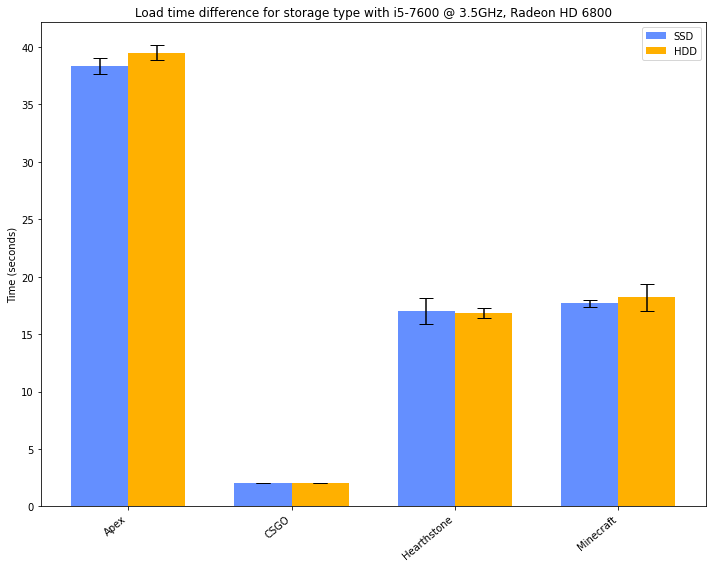

In [251]:
title = 'Load time difference for storage type with i5-7600 @ 3.5GHz, Radeon HD 6800'
trial_type = 'load'

times = df.query( 'GPU == ["Radeon HD 6800"]' )
times = times.query( 'CPU == ["i5-7600 @ 3.5GHz"]' )

times_ssd = times.query( 'storage == ["SSD"]' )
times_ssd = times_ssd.groupby(['game_name'])[[trial_type]]
ci_ssd = 1.960 * times_ssd.std().squeeze() / np.sqrt(times_ssd.size())

times_hdd = times.query( 'storage == ["HDD"]' )
times_hdd = times_hdd.groupby(['game_name'])[[trial_type]]
ci_hdd = 1.960 * times_hdd.std().squeeze() / np.sqrt(times_hdd.size())

plotHWBarChart(times_ssd.mean()[trial_type], times_hdd.mean()[trial_type], 'SSD', 'HDD', times_ssd.mean().index, title, ci_ssd, ci_hdd)

In [252]:
def plotGame(game_name, trial_type, data):
    title = 'Game ' + trial_type + ' time vs iteration for ' + game_name
    plt.figure(figsize=(18, 5))
    for config in data: 
        config_name = config[0]
        metrics = config[1]
        plt.plot(metrics['it'], metrics[trial_type], 'o--', label=config_name)

    plt.xlabel('Iteration')
    plt.ylabel('Time (seconds)')
    plt.title(title)

    plt.legend()

    plt.xticks(range(10))
    plt.savefig(title + '.png')
    plt.show()

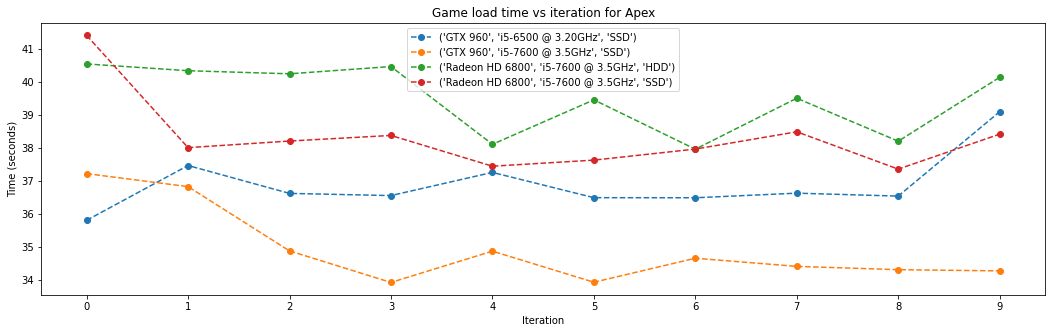

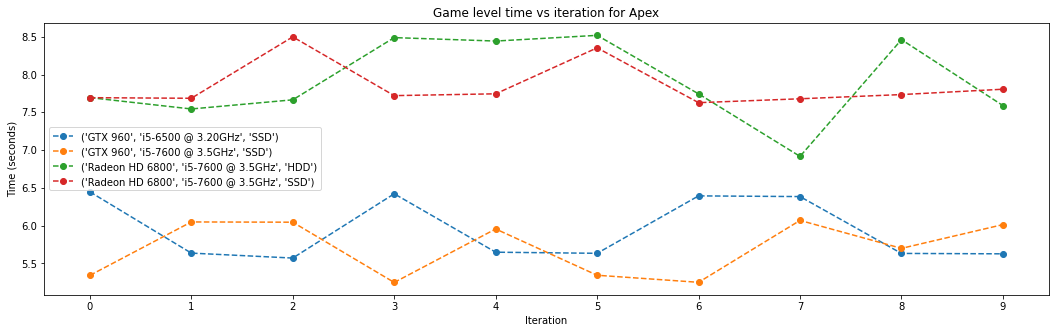

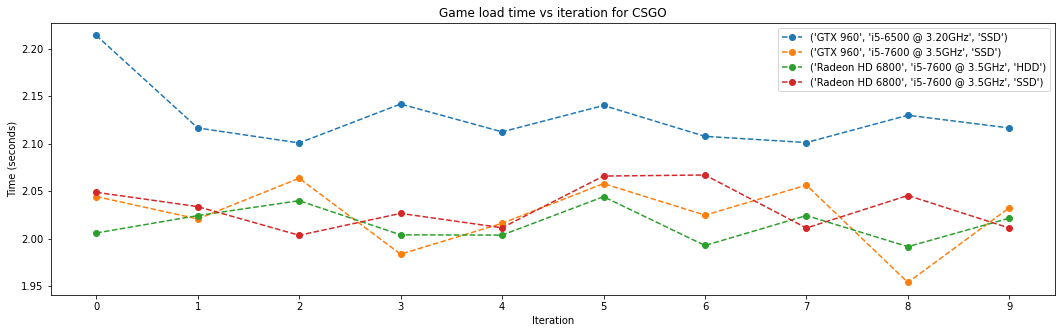

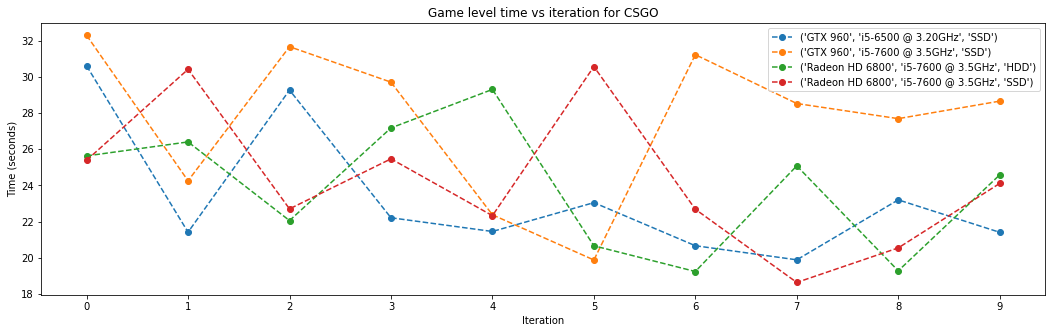

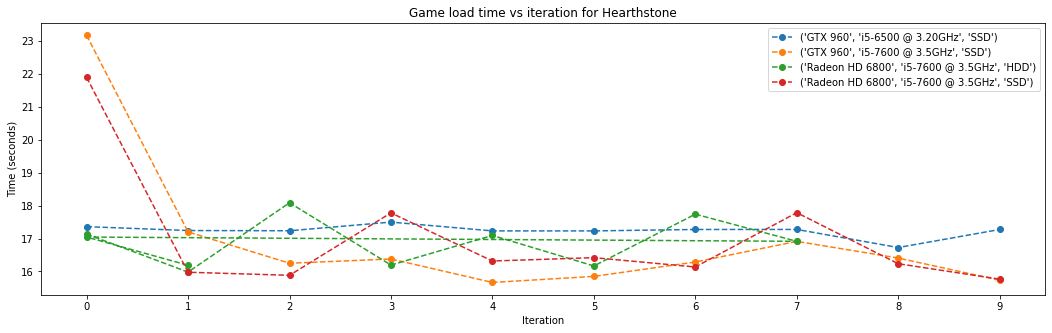

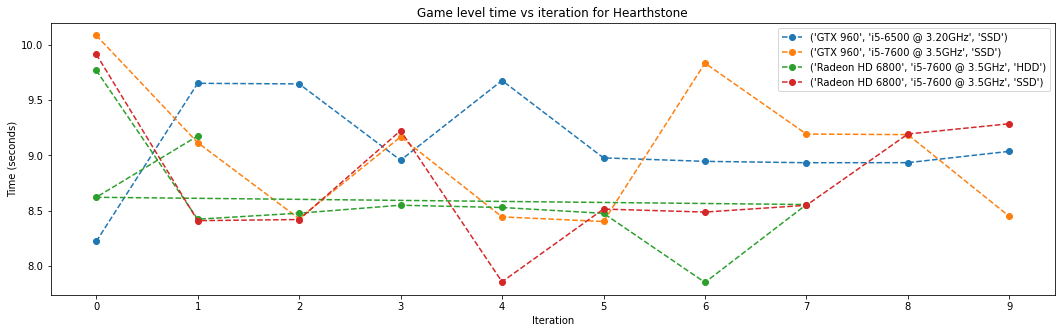

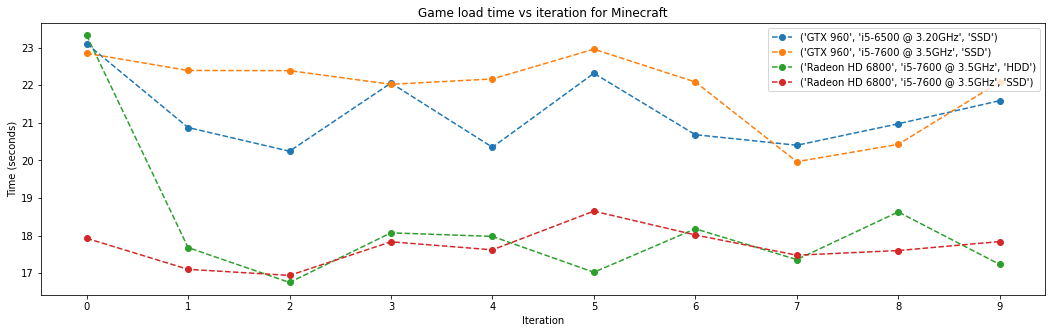

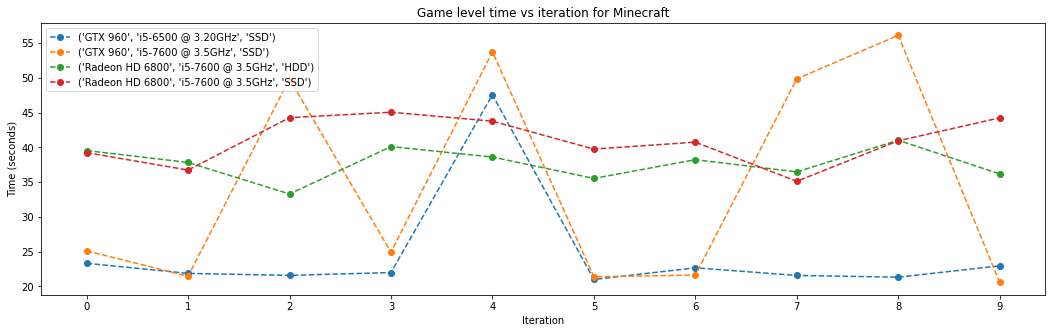

In [191]:
games = df.groupby(['game_name'])
for game in games:
    game_name = game[0]
    data = game[1][['load', 'level', 'it', 'GPU', 'CPU', 'storage']]
    data = data.groupby(['GPU', 'CPU', 'storage'])[['load', 'level', 'it']]
    plotGame(game_name, 'load', data)
    plotGame(game_name, 'level', data)